# Численные методы. Лабораторная работа №12. Косолапов И. ПМ-31

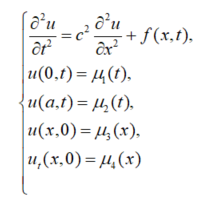

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [2]:
def mu3(x):
    return np.sin(x)

# Task - 1

In [3]:
tau, h, a, b, c = 0.01, 6*pi/100, 6*pi, 10, 3
x = np.arange(0, a, h)
t = np.arange(0, b, tau)
L = c**2/h**2*(np.diag(np.zeros(len(x)) -2) + np.diag(np.zeros(len(x)-1) +1, k = -1) + np.diag(np.zeros(len(x)-1 )+1, k = 1))
L[0] = 0
L[-1] = 0
U = np.zeros((len(t), len(x)))
U[:,0] = 0
U[:,-1] = 0
U[0] = mu3(x)
U[1] = mu3(x) #+ 1/2 * (tau**2*L@mu3(x))

In [200]:
sigma = 3.0/8.0
E = np.eye(len(x))
for i in range(1, len(t)-1):
    U[i+1] = np.linalg.inv(E - sigma*tau**2*L) @ L @ U[i]*tau**2 + 2*U[i] - U[i-1]

In [201]:
from tqdm import tqdm
import glob
import moviepy.editor as mpy

In [202]:
def gif_maker(x,t, U, name):
    plt.style.use('dark_background')
    for i in tqdm(range(0,len(t), 1)):
        fig, ax = plt.subplots(figsize= (12, 7))
        ax.set(xlim=(0, 6*pi), ylim = (-1.3,1.3))
        ax.plot(x, U[i], )
        ax.set_xlabel('x')
        ax.set_ylabel('U')
        ax.set_title(name)
        fig.savefig(f"./pic/{i}.png")
        plt.close()
    
    gif_name = f'{name}'
    fps = 24
    file_list = glob.glob('./pic/*')
    file_list.sort(key = lambda x: int(x.replace('./pic\\', '').replace('.png', '')))
    clip = mpy.ImageSequenceClip(file_list, fps=fps)
    clip.write_gif('{}.gif'.format(gif_name), fps=fps)
gif_maker(x,t, U, 'Task-1')

100%|██████████| 1000/1000 [01:23<00:00, 12.02it/s]


MoviePy - Building file Task-1.gif with imageio.


![ChessUrl](./Task-1.gif)

# Task - 2 

In [4]:
def mu3(x):
    return np.sin(x*(1+0.1*np.exp(-(x-10)**2)))

In [5]:
tau, h, a, b, c = 0.01, 6*pi/100, 6*pi, 10, 3
def task2(tau, h, a, b, c):
    x = np.arange(0, a, h)
    t = np.arange(0, b, tau)
    L = c**2/h**2*(np.diag(np.zeros(len(x)) -2) + np.diag(np.zeros(len(x)-1) +1, k = -1) + np.diag(np.zeros(len(x)-1 )+1, k = 1))
    L[0] = 0
    L[-1] = 0
    U = np.zeros((len(t), len(x)))
    U[:,0] = 0
    U[:,-1] = 0
    U[0] = mu3(x)
    U[1] = mu3(x) #+ 1/2 * (tau**2*L@mu3(x))
    sigma = 1/3
    E = np.eye(len(x))
    for i in range(1, len(t)-1):
        U[i+1] = np.linalg.inv(E - sigma*tau**2*L) @ L @ U[i]*tau**2 + 2*U[i] - U[i-1]
    return x,t, U

In [197]:
x, t, U = task2(tau, h, a, b, c)
gif_maker(x,t, U, 'Task-2')

100%|██████████| 1000/1000 [01:30<00:00, 11.10it/s]


MoviePy - Building file Task-2.gif with imageio.


![ChessUrl](./Task-2.gif)

# Task - 3

In [8]:
from tqdm import tqdm

In [9]:
def p(U1, U2, U3):
    return - np.log2(max(abs(U3[::2,::2].flatten() - U2.flatten()))/ max(abs(U2[::2,::2].flatten() - U1.flatten())))

In [10]:
b, tau, h = 1, 1/16, 6*pi/16
mass_tau = [tau, tau/2, tau/4, tau/8, tau/16, tau/32, tau/64]
mass_h = [h, h/2, h/4, h/8, h/16, h/32, h/64]
p_mass = []
for i in tqdm(range(len(mass_tau)-2)):
    x, t, U1 = task2(mass_tau[i], mass_h[i], a, b, c)
    x, t, U2 = task2(mass_tau[i+1], mass_h[i+1], a, b, c)
    x, t, U3 = task2(mass_tau[i+2], mass_h[i+2], a, b, c)
    p_mass.append(p(U1, U2, U3))

100%|██████████| 5/5 [02:06<00:00, 25.36s/it]


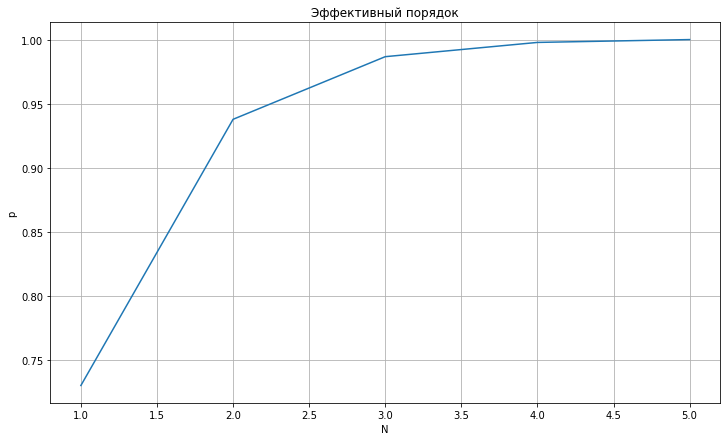

In [11]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(np.arange(1,6),p_mass)
ax.set_title('Эффективный порядок')
ax.set_xlabel('N')
ax.set_ylabel('p')
ax.grid(':')